<a href="https://colab.research.google.com/github/Kosarchik/Lego_pet_project/blob/main/LEGO_pet_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:
1)What is the most enormous LEGO set ever created and how many parts did it have?
2)How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?
3)Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?
4)When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?
5)Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
#Let's start our research with colors in all sets.
colors = pd.read_csv('/content/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [130]:
colors['name'].nunique()

135

In [131]:
colors.groupby('is_trans').count() 

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


**2)How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?**

In [132]:
sets = pd.read_csv('/content/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [133]:
sets.tail()

,set_num,name,year,theme_id,num_parts
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28
11672,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,3


In [134]:
sets.sort_values(by=['year']).head(10) #Sorted by years

,set_num,name,year,theme_id,num_parts
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10
6938,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7
6958,700.B.3-1,Individual 1 x 2 x 2 Window (without glass),1950,371,7
6954,700.A-1,Automatic Binding Bricks Small Brick Set (Lego...,1950,366,24
6951,700.3.4-1,Individual 2 x 3 Bricks,1953,371,5
6955,700.B-1,Early LEGO Windows/Doors (without Glass),1953,371,12
6967,700.F-1,Automatic Binding Bricks - Small Brick Set (Le...,1953,371,48


In [135]:
parts_in_first_year = sets.groupby(["year"]).num_parts.sum() # Use groupby() and count() for counting all sets released each year.
parts_in_first_year.head()


year
1950      71
1953      66
1954     173
1955    1032
1956     222
Name: num_parts, dtype: int64

**Answer on the 2 question : In the first year 1950 of production LEGO sold 7 sets with 71 parts** 

**5)Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?**

In [136]:
by_themes= sets.groupby('theme_id').num_parts.sum()
by_themes.head()

theme_id
1    45167
2     1249
3     5145
4    10091
5     7630
Name: num_parts, dtype: int64

In [137]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean}) # Average parts per set by years
parts_per_set.head()

,num_parts
year,
1950,10.142857
1953,16.500000
1954,12.357143
1955,36.857143
1956,18.500000


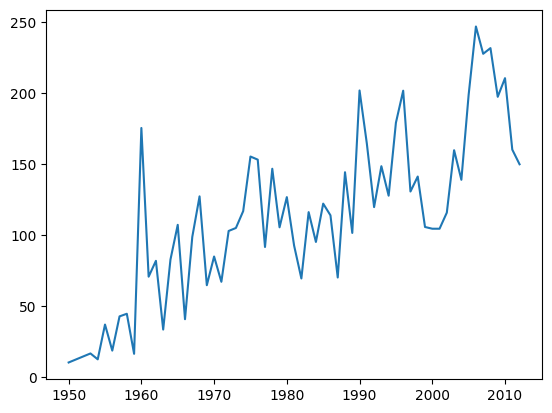

In [138]:
plt.plot(parts_per_set.index[:-5], parts_per_set.num_parts[:-5])

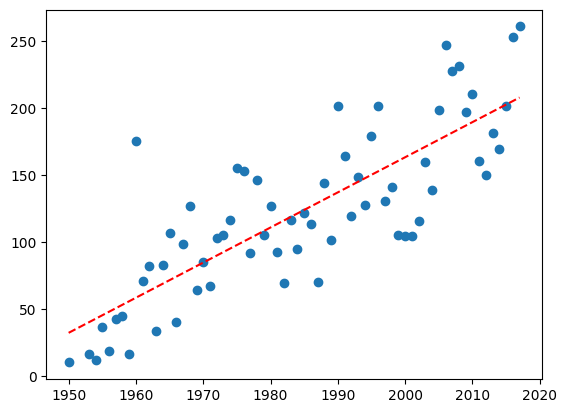

In [139]:
# Let's draw a trend line on our chart. Based on the chart above, I decided to pick a linear type of trend line
grouped = parts_per_set.reset_index()
data = grouped[['year', 'num_parts']]
x = data['year']
y = data['num_parts']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

Answer on the 5 question : LEGO sets grow in size and complexity over time. Average quantity parts in sets grow up in time too. Each 10 years the average quantity parts in set increase on 30 parts

3)Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?

In [140]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [141]:
sets_in_theme = sets.groupby('theme_id').name.count()#Find out a most popular theme 
sets_in_theme.sort_values(ascending=False)

theme_id
501    246
371    240
504    219
220    216
494    192
      ... 
176      1
515      1
383      1
380      1
258      1
Name: name, Length: 575, dtype: int64

In [142]:
top_theme=sets[sets["theme_id"] == 501] # The Star Wars theme
top_theme

,set_num,name,year,theme_id,num_parts
1367,200-2,Building Ideas Book,1985,501,0
1394,2027-1,Pen Pack Alpha,2000,501,0
1600,222-1,Building Ideas Book,1976,501,0
1832,2850828-1,LEGO® Star Wars™ Darth Vader™ Watch,2011,501,0
1833,2850829-1,Luke Skywalker Watch,2011,501,0
...,...,...,...,...,...
11413,LBFIRERESCUE-1,LEGO City: Fire Rescue! - Activity Book,2012,501,0
11573,pk1062,Lego Road Safety Kit Poster,1981,501,0
11575,PS3038-1,LEGO Star Wars: The Complete Saga,2007,501,0
11612,SWDVDBD-1,The Padawan Menace,2011,501,0


Answer on the 3 question: The most popular theme in Lego history is ,, The star wars,, theme (id_501), which has 246 diferents sets. The theme was licensed 

4)When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?

In [143]:
top_theme.sort_values('year')

,set_num,name,year,theme_id,num_parts
1600,222-1,Building Ideas Book,1976,501,0
11573,pk1062,Lego Road Safety Kit Poster,1981,501,0
1367,200-2,Building Ideas Book,1985,501,0
5365,5701-1,LEGO Loco,1998,501,0
5363,5700-1,LEGO Creator,1998,501,0
...,...,...,...,...,...
9754,853439-1,Upscaled Mug,2015,501,0
4802,5004601-1,Wonder Woman Watch,2015,501,0
4780,5004363-1,Brick USB Flash Drive,2015,501,0
4813,5004612-1,Lucy Wyldstyle Minifigure Link Watch,2016,501,0


In [144]:
themes_by_years = sets.groupby('year').agg({'theme_id': pd.Series.nunique})# The quantity of LEGO themes
themes_by_years

,theme_id
year,
1950,2
1953,1
1954,2
1955,4
1956,3
...,...
2013,93
2014,92
2015,98


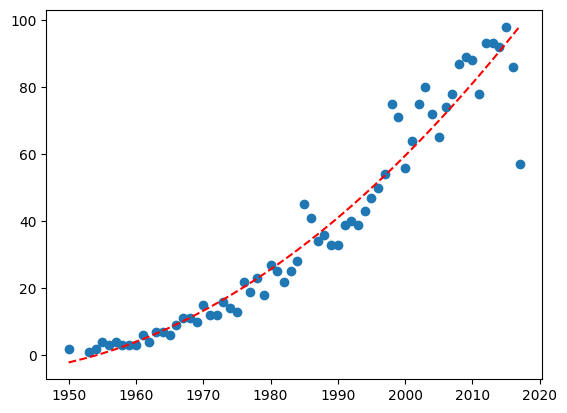

In [127]:
# "To describe the increase the quantity of LEGO themes over time, I decided to plot a graph and add a non-linear trend curve."
themes_by_years = themes_by_years.reset_index()
themes_by_years = themes_by_years [['year', 'theme_id']]
x_1 = themes_by_years['year']
y_1 = themes_by_years['theme_id']
plt.scatter(x_1, y_1)

z_1 = np.polyfit(x_1, y_1, 2)
p_1 = np.poly1d(z_1)
plt.plot(x_1,p_1(x_1),"r--")

plt.show()

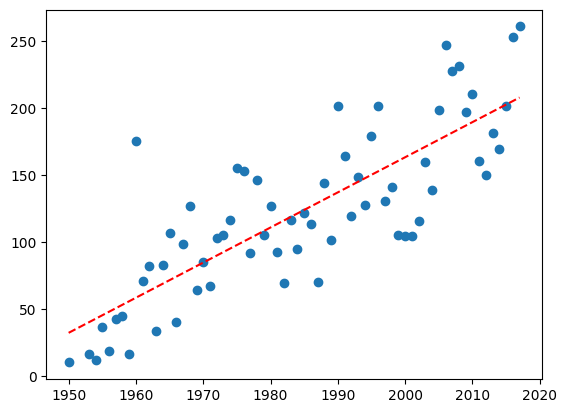

In [145]:
# The recapitulation of average quantity parts in set
data = grouped[['year', 'num_parts']]
x = data['year']
y = data['num_parts']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

The answer to question 4 can be seen in the two plots above. The quantity of themes has increased exponentially over the years, while the average quantity of parts in sets has increased linearly.